# Example: 1D data analyzer

The submodule `fiberis.analyzer.Data1D` is designed to analyze 1D discrete time series data, here is the example how it can read, write and process those kind of data.

In [17]:
from sympy.physics.units import seconds
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fiberis.analyzer.Data1D.core1D import Data1D
import datetime

## Data I/O

### Load data
`Data1D` is able to read the formatted `npz` data file easily using `load_npz` method.

In [2]:
filepath = "../../data/1d/001_pressure_data_sample.npz"
dataframe = Data1D()
dataframe.load_npz(filepath)

Then I'll print the info of dataframe using `print()` or build-in method `.print_info()`.

In [3]:
print(dataframe)

--- Data1D Object Summary: 001_pressure_data_sample.npz ---
Name: 001_pressure_data_sample.npz
Start Time: 2025-08-16T14:01:36.058597
Data: Length=96
  Values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Time Axis (taxis): Length=96
  Values (first 10): [     0.    200.    600.   1400.   3000.   6200.  12600.  25400.  51000.
 102200.]...
History contains 5 records.
----------------------------------------------------


In [5]:
# The function of print_info is same as print
dataframe.print_info()

--- Data1D Object Summary: 001_pressure_data_sample.npz ---
Name: 001_pressure_data_sample.npz
Start Time: 2025-08-16T14:01:36.058597
Data: Length=96
  Values (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Time Axis (taxis): Length=96
  Values (first 10): [     0.    200.    600.   1400.   3000.   6200.  12600.  25400.  51000.
 102200.]...
History contains 5 records.
----------------------------------------------------


### Write data
`Data1D` provides `savez` method to write a complete `Data1D` object into a `npz` file.

In [32]:
# Example for writing data and create a full object.
taxis = np.linspace(0, 8000, 20)
test_data = np.random.random(20)
name = "test_data" # can skip
start_time = datetime.datetime(2025, 1, 1, 4, 51, 4)

dataframe_savez = Data1D()
dataframe_savez.taxis = taxis
dataframe_savez.data = test_data
dataframe_savez.name = name
dataframe_savez.start_time = start_time
dataframe_savez.history.add_record("Dataframe created", level="INFO")

dataframe_savez.savez("../../data/1d/002_savez_data_sample.npz")

### Merge data
`Data1D` provides method to *right* merge two `Data1D` objects.

In [56]:
# Example for merging data
dataframe_left = dataframe.copy()
dataframe_right = dataframe.copy()

dataframe_right.shift(dataframe.taxis[-1] + 400)
dataframe_left.right_merge(dataframe_right)

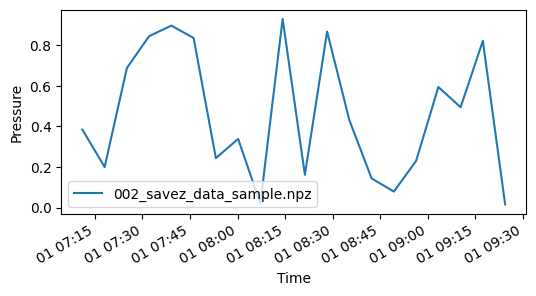

In [59]:
fig, ax = plt.subplots(figsize=(6, 3))
dataframe_right.plot(ax=ax, use_legend=True, use_timestamp=True)
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.show()

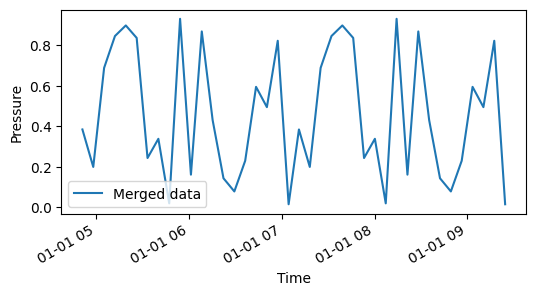

In [60]:
# Plot data
# 1. Original data
dataframe_left.rename("Merged data")
fig, ax = plt.subplots(figsize=(6, 3))
dataframe_left.plot(ax=ax, use_legend=True, use_timestamp=True)
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.show()

## Visualization

`Data1D` provides methods to visualize the data for quick view. It can also combine with other types of data since the `ax` is defined.

In [33]:
filepath = "../../data/1d/002_savez_data_sample.npz"
dataframe = Data1D()
dataframe.load_npz(filepath)

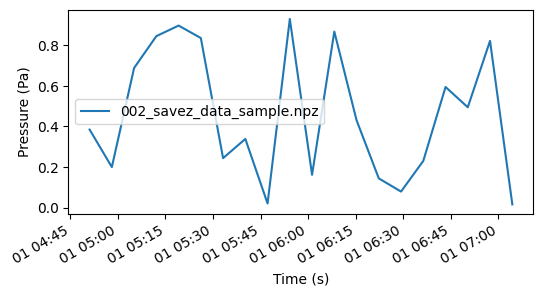

In [34]:
fig, ax = plt.subplots(figsize=(6, 3))
dataframe.plot(ax=ax, use_timestamp=True, use_legend=True) # <- build-in function
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.show()

## Data processing
`Data1D` provides bunch of processing method for data. There will be more methods if author (or you) need them.

### Crop method

`Data1D` provides a `crop/select time` function when you only need part of data. It accepts either `datetime` timestamp or just sec number.

In [35]:
dataframe_crop = dataframe.copy()
dataframe_crop.crop(0, 3600) # get first 1 hour

In [36]:
print(dataframe_crop)

--- Data1D Object Summary: 002_savez_data_sample.npz ---
Name: 002_savez_data_sample.npz
Start Time: 2025-01-01T04:51:04
Data: Length=9
  Values: [0.38469014 0.1996573  0.68863291 0.84582323 0.89805809 0.83657692
 0.24370794 0.33855859 0.01989438]
Time Axis (taxis): Length=9
  Values: [   0.          421.05263158  842.10526316 1263.15789474 1684.21052632
 2105.26315789 2526.31578947 2947.36842105 3368.42105263]
History contains 8 records.
----------------------------------------------------


In [37]:
# OR you can use datetime timestamp
import datetime
dataframe_crop = dataframe.copy()
dataframe_crop.select_time(dataframe_crop.start_time, dataframe_crop.start_time + datetime.timedelta(hours=1))

In [38]:
print(dataframe_crop)

--- Data1D Object Summary: 002_savez_data_sample.npz ---
Name: 002_savez_data_sample.npz
Start Time: 2025-01-01T04:51:04
Data: Length=9
  Values: [0.38469014 0.1996573  0.68863291 0.84582323 0.89805809 0.83657692
 0.24370794 0.33855859 0.01989438]
Time Axis (taxis): Length=9
  Values: [   0.          421.05263158  842.10526316 1263.15789474 1684.21052632
 2105.26315789 2526.31578947 2947.36842105 3368.42105263]
History contains 8 records.
----------------------------------------------------


### Shift method
We will shift the data if we have a timezone issue. As the `crop` method, it can also take float OR `datetime.timedelta`.

In [39]:
# Shift method
dataframe_shift = dataframe.copy()
dataframe_shift.shift(datetime.timedelta(hours=1))

In [40]:
print("Original start time:", f"{dataframe.start_time}")
print("Shifted start time:", f"{dataframe_shift.start_time}")

Original start time: 2025-01-01 04:51:04
Shifted start time: 2025-01-01 05:51:04


Here is an example using sec number.

In [41]:
# Shift method, using float (s) as import
# Let's go back for 1 hour
dataframe_shift = dataframe.copy()
dataframe_shift.shift(-3600)

In [42]:
print("Original start time:", f"{dataframe.start_time}")
print("Shifted start time:", f"{dataframe_shift.start_time}")

Original start time: 2025-01-01 04:51:04
Shifted start time: 2025-01-01 03:51:04


### Get value by time

`Data1D` provides method allowing us to get the value at a specific time point. It will extrapolate if time point is out of the dataset.
val

In [43]:
val = dataframe.get_value_by_time(400)
print(val)
val = dataframe.get_value_by_time(dataframe.start_time + datetime.timedelta(seconds=400))
print(val)

0.20890893749485162
0.20890893749485162


I just forgot to add some meaningful data into this `.npz` file. lol.

### Calculate datetime
This function will return an axis having same size as `taxis` with all the elements in `datetime` format. Will be helpful in dedicated plotting.

In [44]:
print(dataframe.calculate_time()[:10])

['2025-01-01T04:51:04.000000' '2025-01-01T04:58:05.000000'
 '2025-01-01T05:05:06.000000' '2025-01-01T05:12:07.000000'
 '2025-01-01T05:19:08.000000' '2025-01-01T05:26:09.000000'
 '2025-01-01T05:33:10.000000' '2025-01-01T05:40:11.000000'
 '2025-01-01T05:47:12.000000' '2025-01-01T05:54:13.000000']


### Interpolate time axis
Just like it says, `fiberis` can interpolate the data into a new axis.

In [45]:
# Let's say we want to interpolate it in 2x density.
new_axis = dataframe.taxis
midpoints = (new_axis[:-1] + new_axis[1:]) / 2
new_axis = np.empty(len(new_axis) + len(midpoints))
new_axis[::2] = dataframe.taxis
new_axis[1::2] = midpoints

In [50]:
# Interpolate the data
dataframe_interp = dataframe.copy()
dataframe_interp.interpolate(new_axis)
dataframe_interp.rename("Interpolated data")

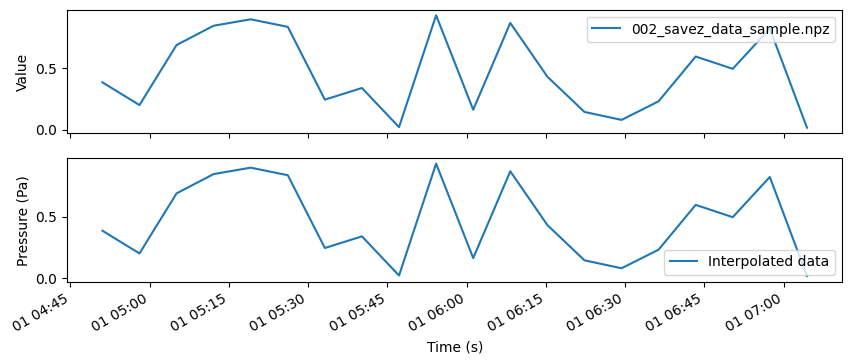

In [55]:
# Compare the results
fig, axs = plt.subplots(2, 1, figsize=(10, 4))
dataframe.plot(axs[0], use_timestamp=True, use_legend=True)
plt.ylabel("Pressure")
# Not showing xticks

dataframe_interp.plot(axs[1], use_timestamp=True, use_legend=True)
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.show()